In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context("talk")


In [12]:
# Load retail sales dataset
df = pd.read_csv(
    "example_retail_sales.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)


df.head()

,y
ds,
1992-01-01,146376
1992-02-01,147079
1992-03-01,159336
1992-04-01,163669
1992-05-01,170068


Text(0.5, 0, 'Time')

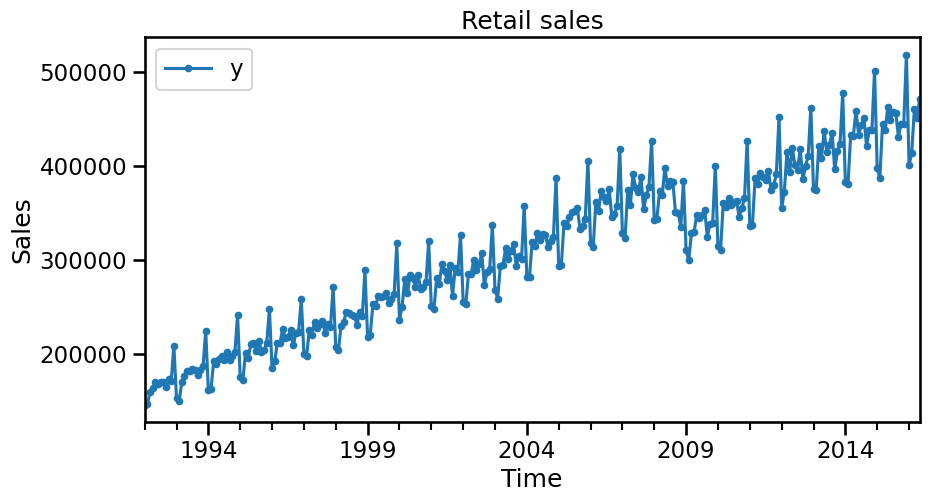

In [13]:
# Plot the time series
ax = df.plot(y="y", marker=".", figsize=[10, 5])
ax.set_title('Retail sales')
ax.set_ylabel('Sales')
ax.set_xlabel('Time')

Text(0.5, 0, 'Time')

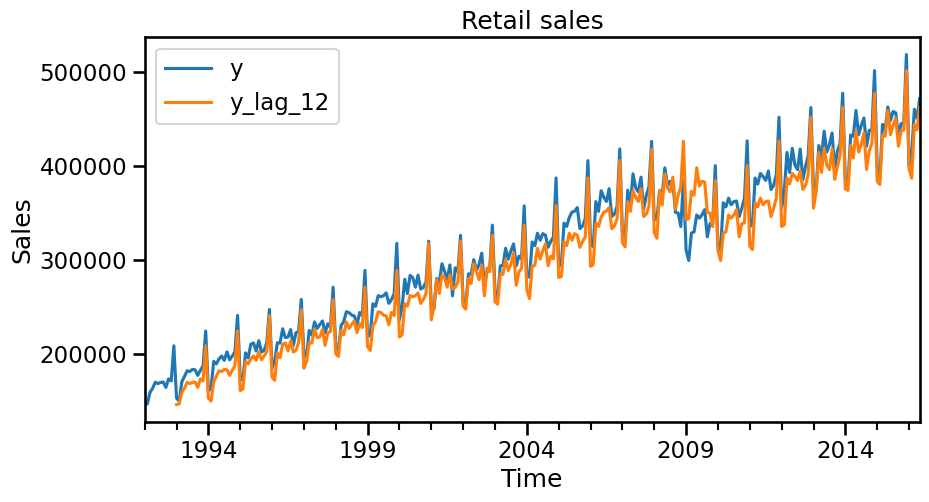

In [16]:
# Compute the lag
df["y_lag_12"] = df["y"].shift(periods=12)

# Plot the sales and the lag 100 sales
ax = df.plot(y=["y", "y_lag_12"], figsize=[10, 5])

ax.set_title('Retail sales')
ax.set_ylabel('Sales')
ax.set_xlabel('Time')

   Time         y     Lag 1
0     0  0.496714       NaN
1     1  0.259107  0.496714
2     2  0.854974  0.259107
3     3  2.207009  0.854974
4     4  1.531454  2.207009


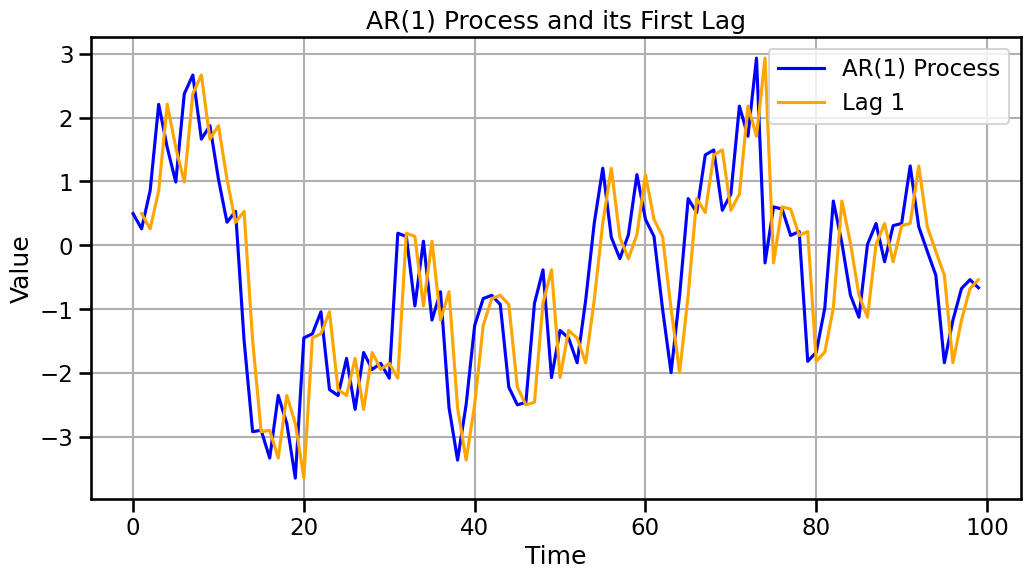

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for AR(1) process
np.random.seed(42)
n = 100  # number of points
phi = 0.8  # autoregressive parameter
sigma = 1  # standard deviation of noise

# Generate AR(1) process
y = np.zeros(n)
noise = np.random.normal(0, sigma, n)
y[0] = noise[0]
for t in range(1, n):
    y[t] = phi * y[t-1] + noise[t]

# Create DataFrame
data = pd.DataFrame({'Time': np.arange(n), 'y': y})
data['Lag 1'] = data['y'].shift(1)
print(data.head())
# Plot the original AR(1) time series and its first lag
plt.figure(figsize=(12, 6))

plt.plot(data['Time'], data['y'], label='AR(1) Process', color='blue')
plt.plot(data['Time'], data['Lag 1'], label='Lag 1', color='orange')

plt.title('AR(1) Process and its First Lag')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


<bound method NDFrame.head of     Time  AR2_Process      Lag1      Lag2
0      0     0.000000       NaN       NaN
1      1     0.000000  0.000000       NaN
2      2     0.647689  0.000000  0.000000
3      3     1.846874  0.647689  0.000000
4      4     0.883590  1.846874  0.647689
..   ...          ...       ...       ...
95    95    -1.673821 -0.415532 -0.008467
96    96    -0.665450 -1.673821 -0.415532
97    97    -0.573816 -0.665450 -1.673821
98    98    -0.481429 -0.573816 -0.665450
99    99    -0.647447 -0.481429 -0.573816

[100 rows x 4 columns]>


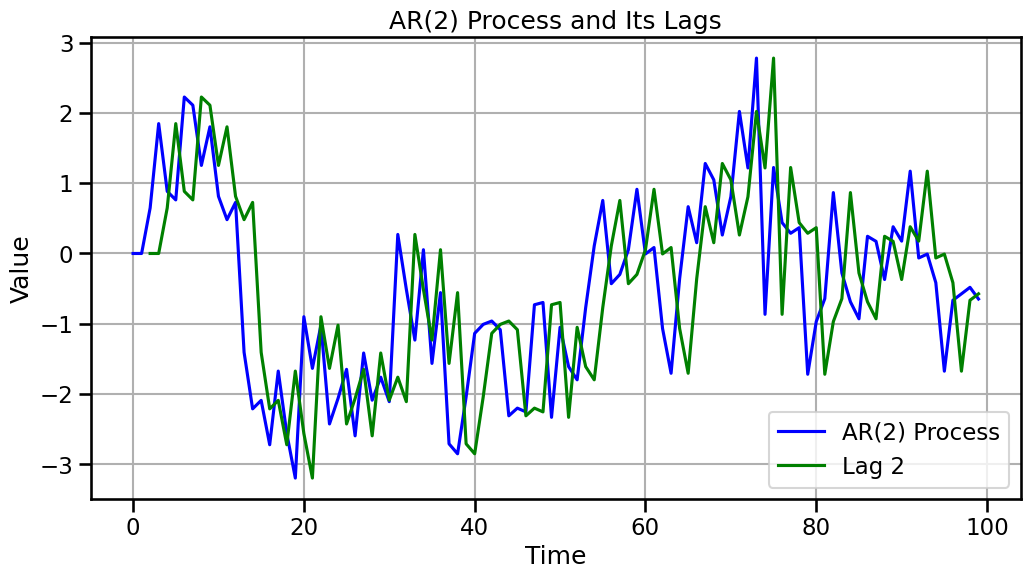

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters for AR(2) process
np.random.seed(42)
n = 100  # Length of the time series
phi1 = 0.5  # AR(1) coefficient
phi2 = 0.3  # AR(2) coefficient
sigma = 1  # Standard deviation of the noise

# Generate white noise
epsilon = np.random.normal(0, sigma, n)

# Initialize the time series with zeros
y = np.zeros(n)

# Generate the AR(2) process
for t in range(2, n):
    y[t] = phi1 * y[t-1] + phi2 * y[t-2] + epsilon[t]

# Create lagged series
y_lag1 = np.roll(y, 1)
y_lag2 = np.roll(y, 2)

# Convert to pandas DataFrame for better handling
data = pd.DataFrame({'Time': np.arange(n), 'AR2_Process': y, 'Lag1': y_lag1, 'Lag2': y_lag2})
data.iloc[0, 2] = np.nan  # Lag1 at t=0 is undefined
data.iloc[0:2, 3] = np.nan  # Lag2 at t=0, t=1 is undefined
print(data.head)
# Plot the AR(2) process and its lags
plt.figure(figsize=(12, 6))

plt.plot(data['Time'], data['AR2_Process'], label='AR(2) Process', color='blue')
#plt.plot(data['Time'], data['Lag1'], label='Lag 1', color='orange')
plt.plot(data['Time'], data['Lag2'], label='Lag 2', color='green')

plt.title('AR(2) Process and Its Lags')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
